# Figure 4
In this notebook, we compute the principal observables (POs) for a 501-node line graph and use them as basis functions to represent signals. We visualize the first 10 principal observables for both uniform and localized distributions, and demonstrate how different signals can be efficiently approximated using a small number of these observables, as shown in Figure 4 in our paper.

In [1]:
import sys
sys.path.append('..')
from poa_utils import *

In [ ]:
# Create a 501 Node Line graph
N = 501
G = nx.Graph()
edge_length = 1/(N-1)    # = 1/500
x=np.linspace(0,1,N)

for i in range(N-1):
    G.add_edge(i,i+1,weight=edge_length)

k = 25
np.random.seed(10)
start=time()
Xp = po_basis(G,k)
end=time()
print(f"Computing {k} principal observables of the line graph with {N} nodes took {end-start:.2f} seconds")


Computing 25 principal observables of the line graph with 501 nodes took 2.64 seconds


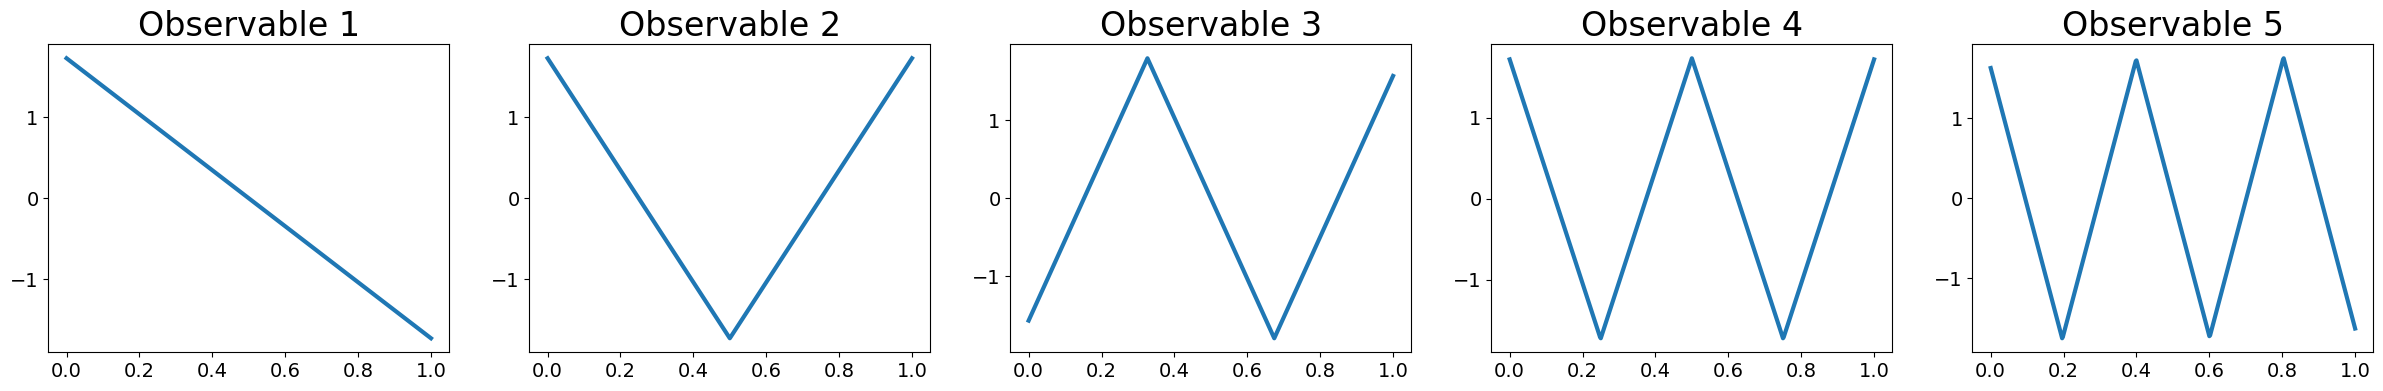

In [3]:
fig, axs = plt.subplots(1, 5, figsize=(30, 4))
for i in range(5):
    ax = axs[i]
    ax.tick_params(axis='both', labelsize=14)
    ax.plot(x, Xp[i],linewidth = 3)
    ax.set_title(f"Observable {i+1}",fontsize = 24)


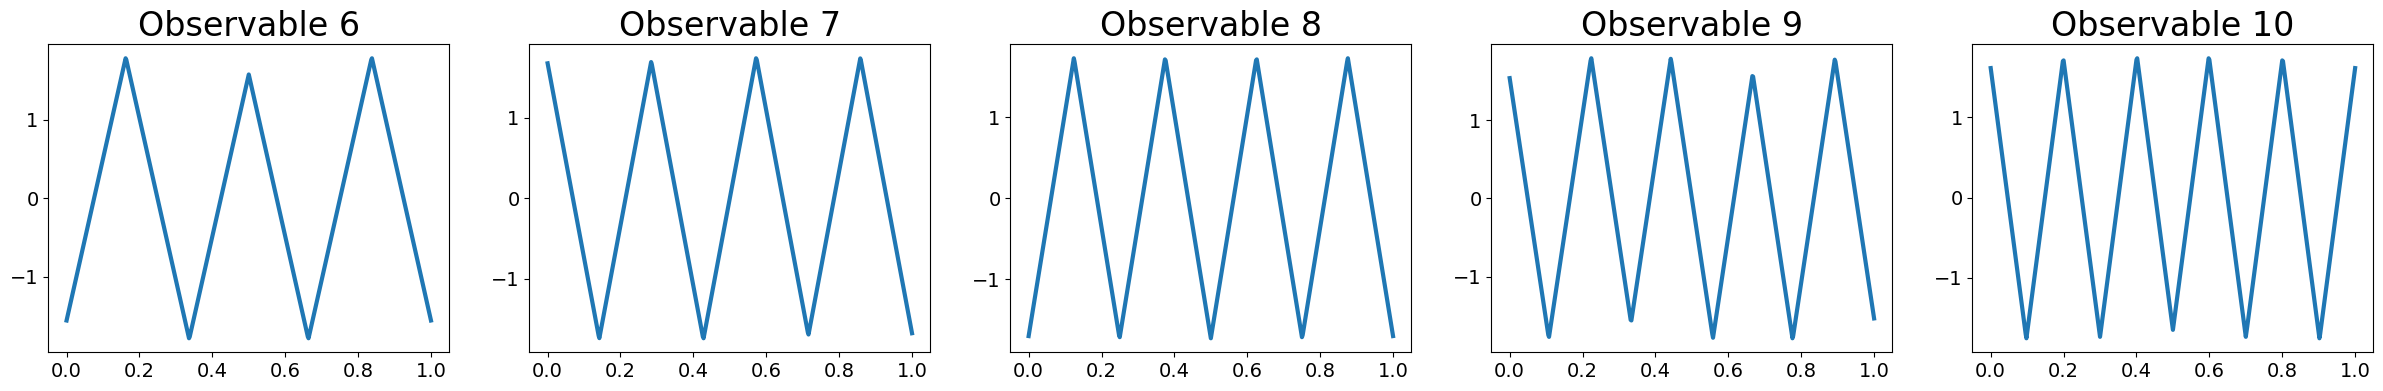

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(30, 4))
for i in range(5):
    ax = axs[i]
    ax.tick_params(axis='both', labelsize=14)
    ax.plot(x, Xp[5+i],linewidth = 3)
    ax.set_title(f"Observable {i+6}",fontsize = 24)

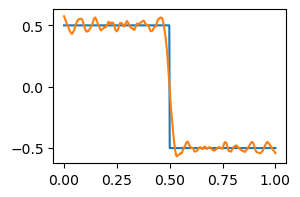

In [ ]:
#S ignal to be approximated:
f=np.zeros(N)
for i in range(len(x)//2):
    f[i]=1
f=f-f.mean()

# Approximation using first 25 principal observables
fapp=np.zeros(N)
for i in range(25):
    v=Xp[i]/np.linalg.norm(Xp[i])
    fapp+=(f@v)*v


fig, ax = plt.subplots(figsize=(3,2))
ax.plot(x,f)
ax.plot(x,fapp)

plt.show()

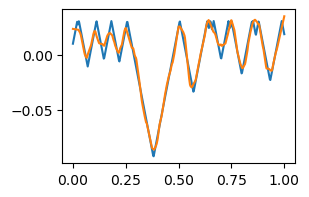

In [ ]:
# Signal to be approximated
np.random.seed(seed=18)
S=uniform.rvs(size=15)
x=np.linspace(0,1,N)
f=-(np.array([np.abs(x-y) for y in S])).min(0)
f=f-f.mean()

# Approximation using first 25 principal observables 
fapp=np.zeros(len(x))
for i in range(25):
    v=Xp[i]/np.linalg.norm(Xp[i])
    fapp+=(f@v)*v
    
fig, ax = plt.subplots(figsize=(3,2))
ax.plot(x,f)
ax.plot(x,fapp)

plt.show()

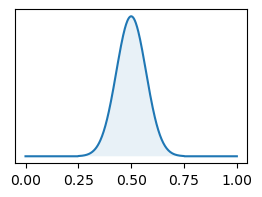

In [ ]:
# Parameters
mu = 0.5  
sigma = 0.07 
N = 501 
x = np.linspace(0, 1, N)

# Localized distribution 
dist = np.exp(-((x - mu)**2) / (2 * (sigma**2)))
dist_cutoff =  np.where((x < 0.25) | (x > 0.75), 0, dist)
dist_cutoff /= np.sum(dist_cutoff)

# Plot the distribution
fig, ax = plt.subplots(figsize=(3,2))
plt.plot(x, dist_cutoff)
plt.fill_between(x, dist_cutoff, alpha=0.1)
ax.set_yticks([])

plt.show()

In [ ]:
# Create a line graph with node weights according to the distribution
G = nx.Graph()
for i in range(N):
    G.add_node(i,weight = dist_cutoff[i])
for i in range(N-1):
    G.add_edge(i, i+1, weight=edge_length)


In [ ]:
# Apply POA 
k = 10
np.random.seed(19)
Xp = po_basis(G,k)

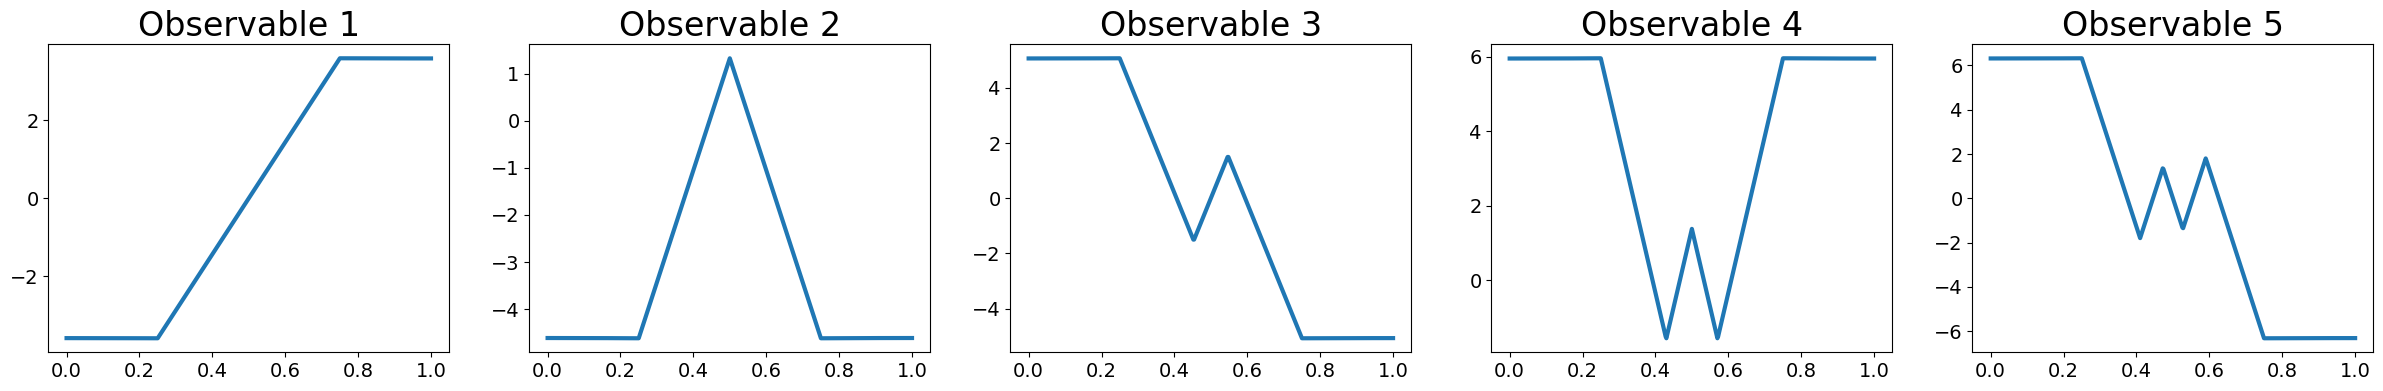

In [10]:
fig, axs = plt.subplots(1, 5, figsize=(30, 4))
for i in range(5):
    ax = axs[i]
    ax.tick_params(axis='both', labelsize=14)
    ax.plot(x, Xp[i],linewidth = 3)
    ax.set_title(f"Observable {i+1}",fontsize = 24)


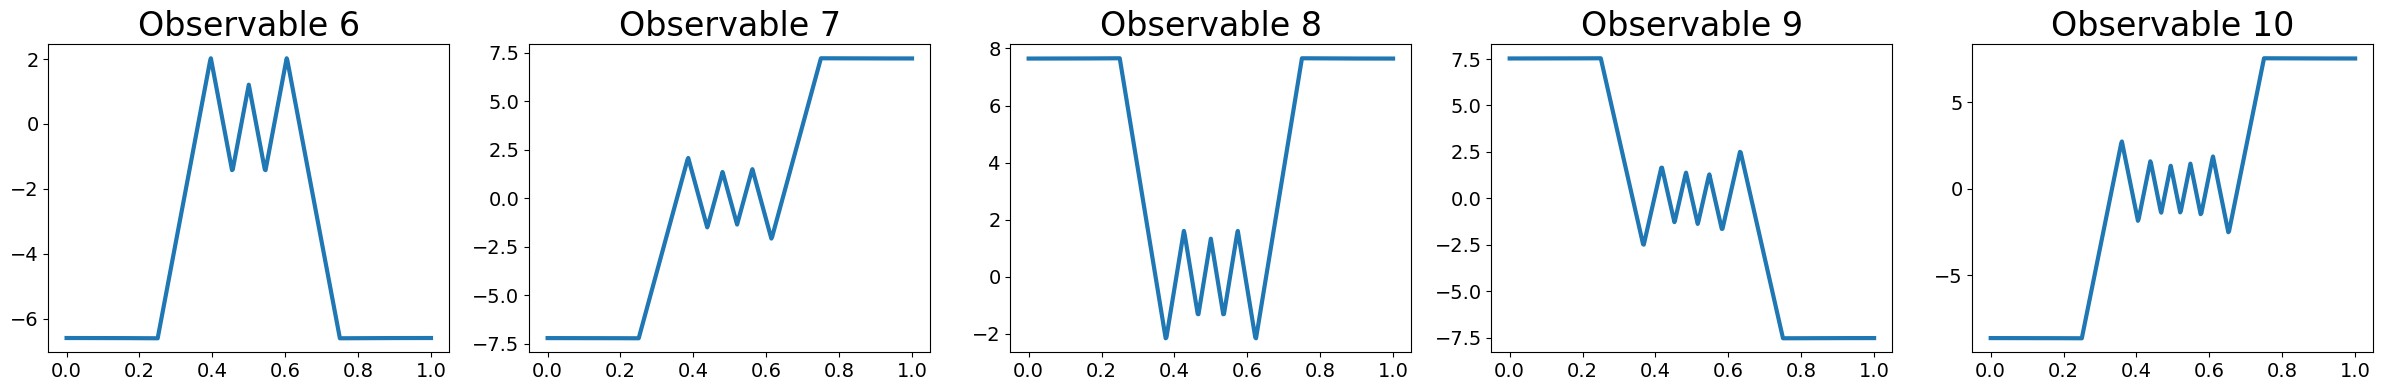

In [11]:
fig, axs = plt.subplots(1, 5, figsize=(30, 4))
for i in range(5):
    ax = axs[i]
    ax.tick_params(axis='both', labelsize=14)
    ax.plot(x, Xp[5+i],linewidth = 3)
    ax.set_title(f"Observable {i+6}",fontsize = 24)
